##The Entire Object Detection Pipeline in one Notebook

The goal of this notebook is to streamline the pipeline from labeled .xml files to training and testing a model. 

Some important aspects of this notebook include:

* For now, we use **TensorFlow 1.15.0** throughout the pipeline
* To minimize changes to this notebook, follow the folder structure:
* We need to modify our PYTHONPATH to use the the ***models*** package

In [1]:
#mount google drive with folder structure
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/machine_learning_projects/object_detection/PdO_workspace'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/machine_learning_projects/object_detection/PdO_workspace


In [2]:
#install and confirm the version of tensorflow
!pip3 install tensorflow==1.15
import tensorflow as tf
assert tf.__version__ == '1.15.0',"Not the right version of tensorflow!"

In [3]:
#this is the version of numpy needed for tensorflow 1.15
!pip install numpy==1.17.4
import numpy as np
assert np.__version__ == '1.17.4', "Not the right version of NumPy!"

In [4]:
%cd '/content/drive/My Drive/machine_learning_projects/object_detection/models/research'
import os
!protoc object_detection/protos/*.proto --python_out=.
os.environ['PYTHONPATH'] += ":/content/drive/My Drive/machine_learning_projects/object_detection/models/research"
os.environ['PYTHONPATH'] += ":/content/drive/My Drive/machine_learning_projects/object_detection/models/research/slim"
!echo $PATH
!echo $PYTHONPATH

/content/drive/My Drive/machine_learning_projects/object_detection/models/research
/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin
/env/python:/content/drive/My Drive/machine_learning_projects/object_detection/models/research:/content/drive/My Drive/machine_learning_projects/object_detection/models/research/slim


In [5]:
#initializing research directory takes 3-4 minutes
%cd /content/drive/My Drive/machine_learning_projects/object_detection/models/research
!python3 setup.py install

/content/drive/My Drive/machine_learning_projects/object_detection/models/research
running install
running bdist_egg
running egg_info
writing object_detection.egg-info/PKG-INFO
writing dependency_links to object_detection.egg-info/dependency_links.txt
writing requirements to object_detection.egg-info/requires.txt
writing top-level names to object_detection.egg-info/top_level.txt
writing manifest file 'object_detection.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
copying object_detection/protos/bipartite_matcher_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/argmax_matcher_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/box_coder_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/anchor_generator_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/eval_pb2.py -> build/lib/object_detection/protos
copying object_det

In [6]:
#installing slim takes < 1 min
%cd /content/drive/My Drive/machine_learning_projects/object_detection/models/research/slim
!python3 setup.py install

/content/drive/My Drive/machine_learning_projects/object_detection/models/research/slim
running install
running bdist_egg
running egg_info
writing slim.egg-info/PKG-INFO
writing dependency_links to slim.egg-info/dependency_links.txt
writing top-level names to slim.egg-info/top_level.txt
writing manifest file 'slim.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/datasets
copying build/lib/datasets/download_and_convert_cifar10.py -> build/bdist.linux-x86_64/egg/datasets
copying build/lib/datasets/build_imagenet_data.py -> build/bdist.linux-x86_64/egg/datasets
copying build/lib/datasets/dataset_factory.py -> build/bdist.linux-x86_64/egg/datasets
copying build/lib/datasets/cifar10.py -> build/bdist.linux-x86_64/egg/datasets
copying build/lib/datasets/dataset_utils.py -> build/bdist.linux-x86_64/egg/datasets
copying build/lib/datasets/download_and_co

In [7]:
#this checks that your environment is set up OK!
%cd /content/drive/My Drive/machine_learning_projects/object_detection/models/research
!python3 object_detection/builders/model_builder_test.py

/content/drive/My Drive/machine_learning_projects/object_detection/models/research
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Running tests under Python 3.6.9: /usr/bin/python3
[ RUN      ] ModelBuilderTest.test_create_experimental_model
[       OK ] ModelBuilderTest.test_create_experimental_model
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_model_from_config_with_example_miner
[       OK ] ModelBuilderTest.test_create_faster_rcnn_model_from_config_with_example_miner
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul
[       OK ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul
[ RU

In [ ]:
##########LEGACY##########
#now we finally train our model using GPU compute!
#only thing needed in training directory is ssd_inception_v2_coco.config
#pre-trained-model should have everything it needs
#delete (if exists_ trained_inference graphs)... will be done in the export function
#%cd '/content/drive/My Drive/machine_learning_projects/object_detection/PdO_workspace'
#!python3 train.py --logtostderr --train_dir='/content/drive/My Drive/machine_learning_projects/object_detection/PdO_workspace/training' --pipeline_config_path='/content/drive/My Drive/machine_learning_projects/object_detection/PdO_workspace/training/ssd_inception_v2_coco.config'
##########LEGACY##########

In [ ]:
#https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/training.html
#New version of training script
%cd '/content/drive/My Drive/machine_learning_projects/object_detection/PdO_workspace'
!python3 '/content/drive/My Drive/machine_learning_projects/object_detection/models/research/object_detection/model_main.py' \
   --pipeline_config_path='/content/drive/My Drive/machine_learning_projects/object_detection/PdO_workspace/training_faster_rcnn/faster_rcnn_inception_resnet_v2_atrous_coco.config' \
   --model_dir='/content/drive/My Drive/machine_learning_projects/object_detection/PdO_workspace/training_faster_rcnn' \
   --alsologtostderr \
   --num_train_steps=10000

In [ ]:
#prints most recent precision values and such
for event in tf.train.summary_iterator('/content/drive/My Drive/machine_learning_projects/object_detection/PdO_workspace/training_faster_rcnn/eval_0/events.out.tfevents.1592722541.9833d8623175'):
    for value in event.summary.value:
        print(value.tag)
        if value.HasField('simple_value'):
            print(value.simple_value)

In [ ]:
#Export trained graph to : trained-inference-graphs/output_inference_graph_v1.pb
#NOTE: Don't forget to change model.ckpt number!
%cd '/content/drive/My Drive/machine_learning_projects/object_detection/PdO_workspace'
!python3 export_inference_graph.py \
  --input_type image_tensor \
  --pipeline_config_path training_faster_rcnn/faster_rcnn_inception_resnet_v2_atrous_coco.config \
  --trained_checkpoint_prefix training_faster_rcnn/model.ckpt-8284 \
  --output_directory faster-rcnn-trained-inference-graphs/output_inference_graph_v1.pb

###Now that we've exported our inference graph, lets test!

In [5]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() #doing this fixes certain gfile issues
import zipfile
import tensorflow.io as tf_io
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

Instructions for updating:
non-resource variables are not supported in the long term


In [6]:
%cd /content/drive/My Drive/machine_learning_projects/object_detection/models/research/object_detection
from utils import label_map_util
from utils import visualization_utils as vis_util

/content/drive/My Drive/machine_learning_projects/object_detection/models/research/object_detection


In [7]:
# What model to download.
MODEL_NAME = 'faster_rcnn_inception_resnet_v2_atrous_coco_2018_01_28'
MODEL_FILE = MODEL_NAME + '.tar.gz'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = '/content/drive/My Drive/machine_learning_projects/object_detection/PdO_workspace/faster-rcnn-trained-inference-graphs/output_inference_graph_v1.pb/frozen_inference_graph.pb' #this is the second model I trained, and was successful!

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = '/content/drive/My Drive/machine_learning_projects/object_detection/PdO_workspace/annotations/label_map.pbtxt' #this label maps, for now, only has raccoons in it!

NUM_CLASSES = 1

In [8]:
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

In [9]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [10]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

Now mean 11.127272727272727 and standard deviation 4.78351162547708
Now mean 11.25 and standard deviation 4.019794770880722
Now mean 11.83076923076923 and standard deviation 3.9234766010584607
Now mean 12.103225806451615 and standard deviation 3.766703347796554


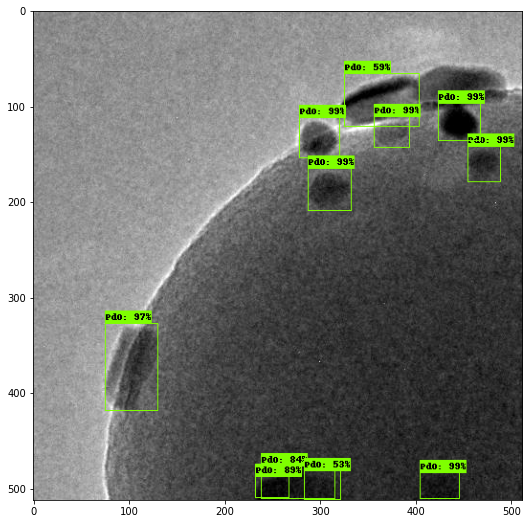

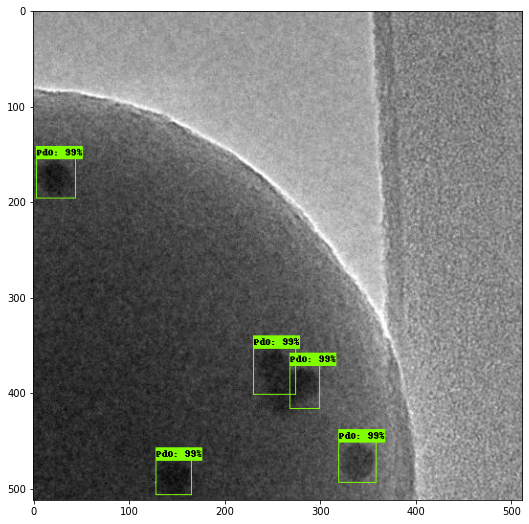

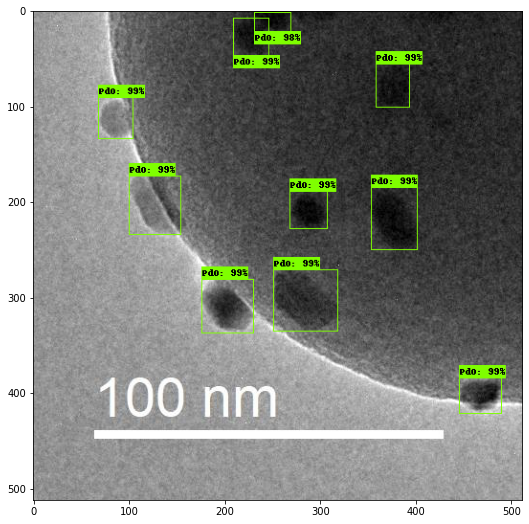

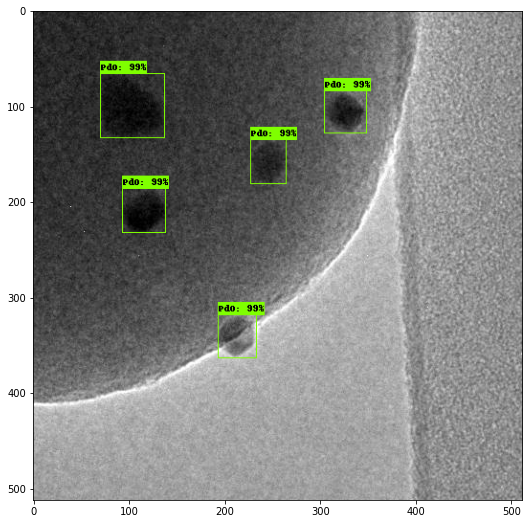

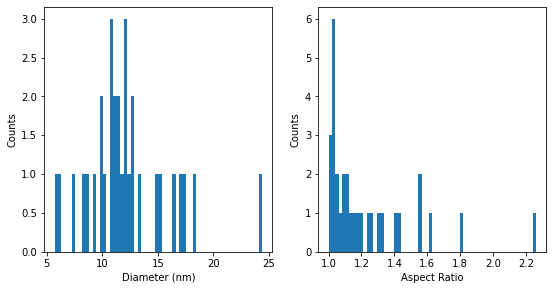

Final mean NC size is 12.103225806451615 nm and standard deviation is 31.121482884246575 percent given 31 measurements taken!


In [14]:
#somehow have to use this twice...
%matplotlib inline

PATH_TO_TEST_IMAGES_DIR = '/content/drive/My Drive/machine_learning_projects/object_detection/PdO_workspace/untouched3_PdO_dense_newmaterial'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, '{}.jpg'.format(i)) for i in range(1, 5) ]

lengths = []
aspect_ratios = []

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        for image_path in TEST_IMAGE_PATHS:
            #print(image_path)
            image = Image.open(image_path)
            # the array based representation of the image will be used later in order to prepare the
            # result image with boxes and labels on it.
            image_np = load_image_into_numpy_array(image)
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
            # Each box represents a part of the image where a particular object was detected.
            boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
            # Each score represent how level of confidence for each of the objects.
            # Score is shown on the result image, together with the class label.
            scores = detection_graph.get_tensor_by_name('detection_scores:0')
            classes = detection_graph.get_tensor_by_name('detection_classes:0')
            num_detections = detection_graph.get_tensor_by_name('num_detections:0')
            # Actual detection.
            (boxes, scores, classes, num_detections) = sess.run(
                [boxes, scores, classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            # Visualization of the results of a detection.
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=1,
                )
            plt.figure(figsize=(12, 9))
            plt.imshow(image_np)
            for i in range(scores.shape[1]):
                if scores[0, i]*100 > 50:
                    figure_edge_length = 139##CRITICAL TO CHANGE
                    d1 = round(figure_edge_length*np.abs(boxes[0, i, 0] - boxes[0, i, 2]), 1)
                    d2 = round(figure_edge_length*np.abs(boxes[0, i, 1] - boxes[0, i, 3]), 1)
                    #print("Nanoparticle dimensions are {} nm by {} nm".format(d1, d2))
                    lengths.append(d1)
                    aspect_ratio = np.max([d1/d2, d2/d1])
                    aspect_ratios.append(aspect_ratio)
                    #lengths.append(d2)
                    #print("Appending {} nm".format((d1+d2)/2))
            print("Now mean {} and standard deviation {}".format(np.mean(lengths), np.std(lengths)))
plt.figure(figsize=(9,4.5))
plt.subplot(1, 2, 1)  # 1 line, 2 rows, index nr 1 (first position in the subplot)
plt.hist(lengths, 60)
plt.xlabel("Diameter (nm)")
plt.ylabel("Counts")
plt.subplot(1, 2, 2)  # 1 line, 2 rows, index nr 2 (second position in the subplot)
plt.hist(aspect_ratios, 60)
plt.xlabel("Aspect Ratio")
plt.ylabel("Counts")
plt.show()

print('Final mean NC size is {} nm and standard deviation is {} percent given {} measurements taken!'.format(np.mean(lengths), np.std(lengths)/np.mean(lengths)*100, len(lengths)))

###Below, we show how to upload a video and do detection on the video, too!

In [24]:
#https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/camera.html
from google.colab.patches import cv2_imshow

import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import cv2

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

# Define the video stream
cap = cv2.VideoCapture('/content/drive/My Drive/machine_learning_projects/object_detection/videos/Recording #10.mp4')  # Change only if you have more than one webcams
frame_width = int(cap.get(3)) 
frame_height = int(cap.get(4))
video_length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('The video has {} frames'.format(video_length))

# What model to download.
# Models can bee found here: https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md
MODEL_NAME = 'faster_rcnn_inception_resnet_v2_atrous_coco_2018_01_28'
MODEL_FILE = MODEL_NAME + '.tar.gz'
#DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = '/content/drive/My Drive/machine_learning_projects/object_detection/PdO_workspace/faster-rcnn-trained-inference-graphs/output_inference_graph_v1.pb/frozen_inference_graph.pb' #this is the second model I trained, and was successful!

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = '/content/drive/My Drive/machine_learning_projects/object_detection/PdO_workspace/annotations/label_map.pbtxt' #this label maps, for now, only has raccoons in it!

# Number of classes to detect
NUM_CLASSES = 1

# Load a (frozen) Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.compat.v1.GraphDef()
    with tf.io.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

# Helper code
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

# Detection
out = cv2.VideoWriter('first_recording_annotated.avi',cv2.VideoWriter_fourcc(*'DIVX'), 20, (frame_width, frame_height) )

with detection_graph.as_default():
    with tf.compat.v1.Session(graph=detection_graph) as sess:
        for f in range(video_length - 1):
            # Read frame from camera
            ret, image_np = cap.read()
            print('Reading image {}'.format(f))

            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)
            # Extract image tensor
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
            # Extract detection boxes
            boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
            # Extract detection scores
            scores = detection_graph.get_tensor_by_name('detection_scores:0')
            # Extract detection classes
            classes = detection_graph.get_tensor_by_name('detection_classes:0')
            # Extract number of detectionsd
            num_detections = detection_graph.get_tensor_by_name(
                'num_detections:0')
            # Actual detection.
            (boxes, scores, classes, num_detections) = sess.run(
                [boxes, scores, classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            # Visualization of the results of a detection.
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=8)

            # Display output
            #cv2_imshow(cv2.resize(image_np, (200, 150)))

            out.write(cv2.resize(image_np, (frame_width, frame_height)))

            if cv2.waitKey(25) & 0xFF == ord('q'):
                cv2.destroyAllWindows()
                break

out.release()

The video has 901 frames
Reading image 0
Reading image 1
Reading image 2
Reading image 3
Reading image 4
Reading image 5
Reading image 6
Reading image 7
Reading image 8
Reading image 9
Reading image 10
Reading image 11
Reading image 12
Reading image 13
Reading image 14
Reading image 15
Reading image 16
Reading image 17
Reading image 18
Reading image 19
Reading image 20
Reading image 21
Reading image 22
Reading image 23
Reading image 24
Reading image 25
Reading image 26
Reading image 27
Reading image 28
Reading image 29
Reading image 30
Reading image 31
Reading image 32
Reading image 33
Reading image 34
Reading image 35
Reading image 36
Reading image 37
Reading image 38
Reading image 39
Reading image 40
Reading image 41
Reading image 42
Reading image 43
Reading image 44
Reading image 45
Reading image 46
Reading image 47
Reading image 48
Reading image 49
Reading image 50
Reading image 51
Reading image 52
Reading image 53
Reading image 54
Reading image 55
Reading image 56
Reading image 57

In [18]:
#/content/drive/My Drive/machine_learning_projects/object_detection/models/research/object_detection
#this is where the video ends up...

/content/drive/My Drive/machine_learning_projects/object_detection/models/research/object_detection


###Now if you're like me and want to show things off, turn the video into a GIF and upload online! I use ScreenToGif locally. Enjoy!